In [9]:
import ast
from coverage_functions import *
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
# reviewed homo sapiens proteome from UniProt 2022_04
# this dataset is filtered according to certain thresholds
proteome = pd.read_excel("processed_data/uniprot/30aa_nounchar_noputative_ref_proteome_protein_existence_filtered_02.xlsx", header=0)
# find total proteome length
proteome_length = np.sum(proteome.Length) # 10789741
total_prot_num = proteome.Entry.nunique()

In [ ]:
# filtered pdb structures for uniprot entries
pdb = pd.read_csv("processed_data/uniprot/proteome_have_pdb_begin_end_missing_consec_greater_30pdb.csv")
# load homology modeling datasets
modbase = pd.read_csv("processed_data/modbase/modbase_30aa_hq_fixed.tsv", sep="\t")
swissmodel = pd.read_csv("processed_data/swissmodel/swissmodel_30aa_hq.tsv", sep="\t")
swissmodel = swissmodel.rename(columns={'UniProtKB_ac': 'Entry', 'uniprot_seq_length': 'Length', 'from': 'TargetBeg', 'to': 'TargetEnd'})
# print(len(modbase), len(swissmodel)) # double checking

In [13]:
modbase_cov = pd.read_excel('processed_data/modbase/modbase_30aa_hq_fixed_cov.xlsx')
swissmodel_cov = pd.read_excel("processed_data/swissmodel/swissmodel_30aa_hq_cov.xlsx")

In [14]:
# filtered alphafold structures
af_85 = pd.read_excel('processed_data/alphafold/all_af_acc_85.xlsx')
af_70 = pd.read_excel('processed_data/alphafold/all_af_acc_70.xlsx')
af_50 = pd.read_excel('processed_data/alphafold/all_af_acc_50.xlsx')

In [15]:
def get_acc(af_raw):
    af = af_raw[af_raw['Situation'] == 'Yes']
    return af

af_85, af_70, af_50 = get_acc(af_85), get_acc(af_70), get_acc(af_50)

# Coverage Results

Get the number of UniProt IDs modeled by ModBase and SWISS-MODEL.

In [97]:
# calculate the number of proteins when residue coverages are above a certain threshold
swissmodel_90 = get_res_coverage_by_threshold(swissmodel, 90)
swissmodel_70 = get_res_coverage_by_threshold(swissmodel, 70)
swissmodel_50 = get_res_coverage_by_threshold(swissmodel, 50)

modbase_90 = get_res_coverage_by_threshold(modbase, 90)
modbase_70 = get_res_coverage_by_threshold(modbase, 70)
modbase_50 = get_res_coverage_by_threshold(modbase, 50)

In [98]:
# also calculate the percentage protein-based coverage for the same thresholds
swissmodel_90_pc = get_protein_based_coverage(swissmodel_90, total_prot_num)
swissmodel_70_pc = get_protein_based_coverage(swissmodel_70, total_prot_num)
swissmodel_50_pc = get_protein_based_coverage(swissmodel_50, total_prot_num)

modbase_90_pc = get_protein_based_coverage(modbase_90, total_prot_num)
modbase_70_pc = get_protein_based_coverage(modbase_70, total_prot_num)
modbase_50_pc = get_protein_based_coverage(modbase_50, total_prot_num)

In [99]:
# number of proteins, percent to total number of proteins
print(f"SWISS-MODEL residue coverage >= 90%: {swissmodel_90, swissmodel_90_pc}") # we can model 90% of 2500 proteins
print(f"SWISS-MODEL residue coverage >= 70%: {swissmodel_70, swissmodel_70_pc}")
print(f"SWISS-MODEL residue coverage >= 50%: {swissmodel_50, swissmodel_50_pc}")

print(f"ModBase residue coverage >= 90%:  {modbase_90, modbase_90_pc}")
print(f"ModBase residue coverage >= 70%:  {modbase_70, modbase_70_pc}")
print(f"ModBase residue coverage >= 50%:  {modbase_50, modbase_50_pc}")

SWISS-MODEL residue coverage >= 90%: (2500, 13.5862)
SWISS-MODEL residue coverage >= 70%: (4783, 25.9932)
SWISS-MODEL residue coverage >= 50%: (5985, 32.5254)
ModBase residue coverage >= 90%:  (3151, 17.1241)
ModBase residue coverage >= 70%:  (4797, 26.0692)
ModBase residue coverage >= 50%:  (5723, 31.1016)


In [8]:
# double checking
print(f"SWISS-MODEL residue coverage >= 90%:  {len(swissmodel_cov[swissmodel_cov.Coverage >= 90])}")
print(f"SWISS-MODEL residue coverage >= 70%:  {len(swissmodel_cov[swissmodel_cov.Coverage >= 70])}")
print(f"SWISS-MODEL residue coverage >= 50%:  {len(swissmodel_cov[swissmodel_cov.Coverage >= 50])}")

print(f"ModBase residue coverage >= 90%:  {len(modbase_cov[modbase_cov.Coverage >= 90])}")
print(f"ModBase residue coverage >= 70%:  {len(modbase_cov[modbase_cov.Coverage >= 70])}")
print(f"ModBase residue coverage >= 50%:  {len(modbase_cov[modbase_cov.Coverage >= 50])}")

SWISS-MODEL residue coverage >= 90%:  2500
SWISS-MODEL residue coverage >= 70%:  4783
SWISS-MODEL residue coverage >= 50%:  5985
ModBase residue coverage >= 90%:  3151
ModBase residue coverage >= 70%:  4797
ModBase residue coverage >= 50%:  5723


In [26]:
# calculate the percentage of the residue-level proteome coverage of both databases
print("SWISS-MODEL max proteome coverage:", np.round(get_coverage_percent(swissmodel, proteome_length), 3))
print("ModBase max proteome coverage:", np.round(get_coverage_percent(modbase, proteome_length), 3))

SWISS-MODEL max proteome coverage: 24.987
ModBase max proteome coverage: 22.179


In [100]:
# more in-depth analysis
common_prots, modbase_common, swissmodel_common, modbase_uncommon, swissmodel_uncommon = get_common_uncommon_elements(modbase, swissmodel)
common = common_prots.groupby(by="Entry").ngroups
only_sm = swissmodel_uncommon.groupby(by="Entry").ngroups
only_mb = modbase_uncommon.groupby(by="Entry").ngroups
print("Number of proteins that are common:", common)
print("Only in SWISS-MODEL:", only_sm)
print("Only in ModBase:", only_mb)

Number of proteins that are common: 5364
Only in SWISS-MODEL: 2522
Only in ModBase: 3254


In [101]:
print(5364 + 2522  == swissmodel.Entry.nunique()) # equal to number of proteins in SWISS-MODEL, 7886
print(5364 + 3254  == modbase.Entry.nunique()) # equal to number of proteins in ModBase, 8618
print(5364 + 2522 + 3254) # total number of proteins that can be modeled by both databases

True
True
11140


In [103]:
uncommon_swiss_cov = get_coverage_percent(swissmodel_uncommon, proteome_length)
uncommon_mod_cov = get_coverage_percent(modbase_uncommon, proteome_length)
common_cov = get_coverage_percent(common_prots, proteome_length)
np.round((uncommon_swiss_cov + uncommon_mod_cov + common_cov), 2) # 33.022% of the proteome is covered by our two databases

33.02

## Coverage - using PDB filtered datasets

Excluding the residues already covered by PDB.

In [12]:
modbase_extra = pd.read_excel('processed_data/modbase/modbase_30aa_hq_fixed_extra_to_pdb.xlsx')
swissmodel_extra = pd.read_excel('processed_data/swissmodel/swissmodel_30aa_hq_extra_to_pdb.xlsx')
modbase_extra['model_length'] = modbase_extra['TargetEnd'] - modbase_extra['TargetBeg'] + 1
print(len(modbase_extra), len(swissmodel_extra)) 

27091 5930


In [77]:
modbase_extra.difference.fillna(modbase_extra.model_residues, inplace=True)
swissmodel_extra.difference.fillna(swissmodel_extra.model_residues, inplace=True)

In [78]:
modbase_extra['difference'] = modbase_extra['difference'].apply(lambda x: eval(x))
swissmodel_extra['difference'] = swissmodel_extra['difference'].apply(lambda x: eval(x))

In [81]:
def get_res_coverage_by_threshold_extra(df, threshold, gb="Entry"):
    dfs = [x for _, x in df.groupby(by=gb)]
    coverage_percents = []
    for df in dfs:
        covered_resid = set()
        prot_length = list(set(df["Length"].to_list()))[0]
        for model in range(len(df)):
            covered_resid.update(df.iloc[model].difference)
        coverage_percents.append(len(covered_resid) * 100 / prot_length)
    
    num_proteins = 0
    for i in coverage_percents:
        if i >= threshold:
            num_proteins += 1
    return num_proteins

In [82]:
# calculate the number of proteins when residue coverages are above a certain threshold
swissmodel_90 = get_res_coverage_by_threshold_extra(swissmodel_extra, 90)
swissmodel_70 = get_res_coverage_by_threshold_extra(swissmodel_extra, 70)
swissmodel_50 = get_res_coverage_by_threshold_extra(swissmodel_extra, 50)

modbase_90 = get_res_coverage_by_threshold_extra(modbase_extra, 90)
modbase_70 = get_res_coverage_by_threshold_extra(modbase_extra, 70)
modbase_50 = get_res_coverage_by_threshold_extra(modbase_extra, 50)

In [84]:
# also calculate the percentage protein-based coverage for the same thresholds
swissmodel_90_pc = get_protein_based_coverage(swissmodel_90, total_prot_num)
swissmodel_70_pc = get_protein_based_coverage(swissmodel_70, total_prot_num)
swissmodel_50_pc = get_protein_based_coverage(swissmodel_50, total_prot_num)

modbase_90_pc = get_protein_based_coverage(modbase_90, total_prot_num)
modbase_70_pc = get_protein_based_coverage(modbase_70, total_prot_num)
modbase_50_pc = get_protein_based_coverage(modbase_50, total_prot_num)

In [85]:
# number of proteins, percent to total number of proteins
print(f"SWISS-MODEL residue coverage >= 90%: {swissmodel_90, swissmodel_90_pc}") # we can model 90% of 705 proteins
print(f"SWISS-MODEL residue coverage >= 70%: {swissmodel_70, swissmodel_70_pc}")
print(f"SWISS-MODEL residue coverage >= 50%: {swissmodel_50, swissmodel_50_pc}")

print(f"ModBase residue coverage >= 90%:  {modbase_90, modbase_90_pc}")
print(f"ModBase residue coverage >= 70%:  {modbase_70, modbase_70_pc}")
print(f"ModBase residue coverage >= 50%:  {modbase_50, modbase_50_pc}")

SWISS-MODEL residue coverage >= 90%: (705, 3.8313)
SWISS-MODEL residue coverage >= 70%: (1562, 8.4887)
SWISS-MODEL residue coverage >= 50%: (2062, 11.2059)
ModBase residue coverage >= 90%:  (1446, 7.8583)
ModBase residue coverage >= 70%:  (2247, 12.2113)
ModBase residue coverage >= 50%:  (2711, 14.7329)


In [86]:
def get_coverage_percent_extra(df, proteome_length, gb="Entry"):
    dfs = [x for _, x in df.groupby(by=gb)]
    coverage_percent = 0
    for df in dfs:
        covered_resid = set()
        for model in range(len(df)):
            covered_resid.update(df.iloc[model].difference)
        coverage_percent += len(covered_resid) * 100 / proteome_length
    return coverage_percent

In [88]:
# calculate the percentage of the residue-level proteome coverage of both databases
print("SWISS-MODEL max proteome coverage:", np.round(get_coverage_percent_extra(swissmodel_extra, proteome_length), 2))
print("ModBase max proteome coverage:", np.round(get_coverage_percent_extra(modbase_extra, proteome_length), 2))

SWISS-MODEL max proteome coverage: 10.09
ModBase max proteome coverage: 11.95


In [89]:
# more in-depth analysis
common_prots2, modbase_common2, swissmodel_common2, modbase_uncommon2, swissmodel_uncommon2 = get_common_uncommon_elements(modbase_extra, swissmodel_extra)
common2 = common_prots2.groupby(by="Entry").ngroups
only_sm2 = swissmodel_uncommon2.groupby(by="Entry").ngroups
only_mb2 = modbase_uncommon2.groupby(by="Entry").ngroups
print("Number of proteins that are common:", common2)
print("Only in SWISS-MODEL:", only_sm2)
print("Only in ModBase:", only_mb2)

Number of proteins that are common: 3108
Only in SWISS-MODEL: 1796
Only in ModBase: 4192


In [106]:
print(common2 + only_sm2  == swissmodel_extra.Entry.nunique(), common2 + only_sm2)
print(common2 + only_mb2  == modbase_extra.Entry.nunique(), common2 + only_mb2)
print('Total number of proteins covered: ', common2+only_mb2+only_sm2)

True 4904
True 7300
Total number of proteins covered:  9096


In [93]:
uncommon_swiss_cov2 = get_coverage_percent_extra(swissmodel_uncommon2, proteome_length)
uncommon_mod_cov2 = get_coverage_percent_extra(modbase_uncommon2, proteome_length)
common_cov2 = get_coverage_percent_extra(common_prots2, proteome_length)
np.round((uncommon_swiss_cov2 + uncommon_mod_cov2 + common_cov2), 2) # 16.47% of the proteome is covered by our two databases

16.47

# Structure Classification

In [ ]:
# get all covered residues for every entry (missings already removed)
def get_all_covered_residues(pdb_file):
    pdb_file = pdb_file.drop_duplicates(subset=["Entry", "ResidueList"], keep="last") # 51845
    pdb_file['ResidueList'] = pdb_file['ResidueList'].apply(lambda x: ast.literal_eval(x))
    pdb_file2 = pdb_file.groupby('Entry')['ResidueList'].apply(list).reset_index(name='AllCoveredResidues')
    pdb_file2['AllCoveredResidues'] = pdb_file2['AllCoveredResidues'].apply(lambda x: sum(x, [])).apply(set)
    return pdb_file2

pdb2 = get_all_covered_residues(pdb)
pdb2['covered_len'] = pdb2.apply(lambda x: len(x['AllCoveredResidues']), axis=1)

In [17]:
pdb_len = pdb[['Entry', 'Length']]

In [18]:
pdb_cov = pd.merge(pdb2, pdb_len, on='Entry', how='left')
pdb_cov = pdb_cov.drop_duplicates('Entry')
pdb_cov['Coverage'] = pdb_cov.apply(lambda x: x['covered_len']/x['Length']*100, axis=1)

In [19]:
def classify(cov_df, df_name, total_prot_num, col='Coverage'):
    stats = [df_name, 0, 0, 0] # database name, high cov str (>=80%), partial (<80%) str, nothing.
    stats[1] = len(cov_df[cov_df[col] >= 80])
    stats[2] = len(cov_df[cov_df[col] < 80])
    stats[3] = total_prot_num - stats[1] - stats[2]
    
    return stats

In [20]:
pdb_stats = classify(pdb_cov, 'PDB', total_prot_num)
swissmodel_stats = classify(swissmodel_cov, 'SWISS-MODEL', total_prot_num)
modbase_stats = classify(modbase_cov, 'ModBase', total_prot_num)
af_85_stats = classify(af_85, 'AF-85', total_prot_num, col='Accuracy_Avg')
af_70_stats = classify(af_70, 'AF-70', total_prot_num, col='Accuracy_Avg')
af_50_stats = classify(af_50, 'AF-50', total_prot_num, col='Accuracy_Avg')

In [22]:
af_50_stats, af_70_stats, af_85_stats

(['AF-50', 7928, 5810, 4663],
 ['AF-70', 7854, 1810, 8737],
 ['AF-85', 4917, 13, 13471])

In [23]:
dfs = [pdb_stats, swissmodel_stats, modbase_stats, af_50_stats, af_70_stats, af_85_stats]
all_stats = pd.DataFrame(data = dfs, columns= ["Database", "Complete structure", "Partial structure", "No structure"])

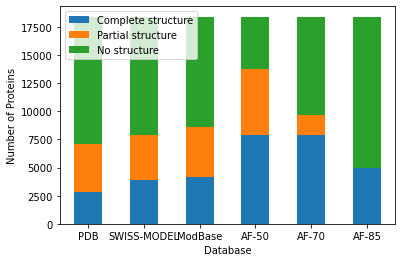

In [24]:
ax = all_stats.plot(x="Database", y=["Complete structure", "Partial structure", "No structure"], kind="bar", rot=0, stacked=True)
#_ = ax.legend(bbox_to_anchor=(0.68, 1), loc='upper left')
_ = ax.legend(bbox_to_anchor=(0, 1), loc='upper left')
#ax.set_title('Structures by Databases')
ax.set_ylabel('Number of Proteins')
plt.savefig('figures/proteome/by_databases_80.png', dpi=600)